In [7]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# 1a. Random Data Generator

1. Univariate gaussian data generator

2. Polynomial basis linear model data generator

https://stackoverflow.com/questions/33274118/generating-numbers-from-normal-distribution-in-python

In [8]:
# Univariate gaussian data generator
# given mean and variace
# X = μ + σZ
# Box–Muller method

def uni_gaussian(m, s):
    U = np.random.uniform(low=0.0, high=1.0)
    V = np.random.uniform(low=0.0, high=1.0)
    Z = math.sqrt(-2*math.log(U))*math.cos(2*math.pi*V)
    return m+Z*s**(0.5)

In [9]:
m = 20
s = 10

In [10]:
uni_gaussian(m,s)

16.9983308068067

In [11]:
uni_gaussian(m,s)

19.655075347511712

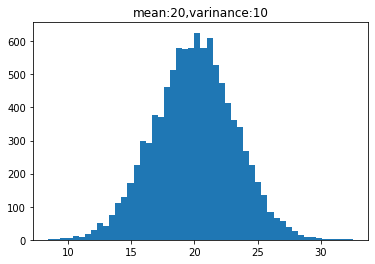

In [12]:
data_points=[]
for i in range(10000):
    data_points.append(uni_gaussian(m,s))
plt.hist(data_points,50)
plt.title('mean:{},varinance:{}'.format(m,s))
plt.show()

# 1b. Polynomial basis linear model data generator

In [13]:
def poly_generator(a,n,w):
    e = uni_gaussian(0,a)
    x = np.random.uniform(low=-1.0, high=1.0)
    x1=[]
    for i in range(n):
        x1.append(x**i)
    x1 = np.array(x1)
    y = np.sum(w*x1)
    
    return x, y+e

In [14]:
n=2  #basis number
a=10 #variance of N(0,a)
w=np.asarray([2,5])

poly_generator(a,n,w)

(-0.5665874218969811, -2.8588312244484286)

# 2. Sequential Estimator

Online learning: 

https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm

In [15]:
# Welford's online algorithm
def sequential_estimator(m, s, epsilon, num_sample):
    m_init = 0
    s_init = 0
    n = 1
    print('Data point source function: N({},{})'.format(m, s))
    while (abs(m_init-m) > epsilon) or (abs(s_init-s**2) > epsilon) and n < num_sample:
        n += 1
        data = uni_gaussian(m, s)
        # m -> mean
        # s -> unbiased sample variance
        # don't choose biased sample variance?
        m_new = m_init + (data - m_init)/n
        s_new = s_init + (data - m_init)**2/n - s_init/(n-1)
        print('Add data point: {}'.format(data))
        print('Mean={}  Variance={}'.format(m_new,s_new))
        print()
        m_init = m_new
        s_init = s_new        

In [16]:
m = 3.0
s = 5.0
num_sample = 10000
epsilon = 1e-1

sequential_estimator(m, s, epsilon, num_sample)

Data point source function: N(3.0,5.0)
Add data point: 3.951944991496549
Mean=1.9759724957482745  Variance=7.80893460790733

Add data point: 5.070079678203278
Mean=3.007341556566609  Variance=7.095633722793545

Add data point: 4.387140902994666
Mean=3.3522913931736236  Variance=5.2063840409631865

Add data point: 1.9882369241828308
Mean=3.079480499375465  Variance=4.27691694959714

Add data point: 3.7389375247446015
Mean=3.1893900036036547  Variance=3.4940141543958303

Add data point: 4.441308196685078
Mean=3.368235459758144  Variance=3.135578342306276

Add data point: 3.0137083697360083
Mean=3.323919573505377  Variance=2.7033497613146107

Add data point: 6.014775483436175
Mean=3.622903563497688  Variance=3.169953877595785

Add data point: 1.987838336434896
Mean=3.459397040791409  Variance=3.085080609760132

Add data point: 3.7296629715313174
Mean=3.483966670858673  Variance=2.783212882722183

Add data point: 3.938828177048642
Mean=3.521871796374504  Variance=2.54743511223189

Add data

Mean=3.044395308660206  Variance=4.907212108530725

Add data point: 1.580191059900941
Mean=3.0420222061500612  Variance=4.902720561885881

Add data point: -1.4060552071167436
Mean=3.034824669882639  Variance=4.926789697889165

Add data point: 2.0252366489493125
Mean=3.03319367146433  Variance=4.920464182739744

Add data point: 0.9230714528116599
Mean=3.0297902485310195  Variance=4.919696767483784

Add data point: 4.74974892847412
Mean=3.032559908241073  Variance=4.916525472956314

Add data point: -1.0141307040643044
Mean=3.026053974780775  Variance=4.934935862551976

Add data point: -0.41677774273033874
Mean=3.0205277601459257  Variance=4.946027709088192

Add data point: 4.643761050899929
Mean=3.023129095547775  Variance=4.942311234020614

Add data point: 1.1579262086245692
Mean=3.020144770928698  Variance=4.939957234348292

Add data point: 5.255531060265248
Mean=3.0237156755442514  Variance=4.940035653991472

Add data point: 1.8777640656428551
Mean=3.02188800152527  Variance=4.9342386

Add data point: 4.633959199833155
Mean=2.9601199970520504  Variance=4.738238730399498

Add data point: 3.534774602371869
Mean=2.9605860591812636  Variance=4.734660582152961

Add data point: 0.11486954812719619
Mean=2.958279968005369  Variance=4.7373831120778584

Add data point: 4.715918790796394
Mean=2.959703157335564  Variance=4.736045518614719

Add data point: 1.9726485566077112
Mean=2.9589045694708975  Variance=4.732998913769681

Add data point: 3.047670188335848
Mean=2.9589763282573687  Variance=4.729175996335708

Add data point: 1.7925162047624936
Mean=2.958034114910442  Variance=4.726451949584755

Add data point: 4.08138599227225
Mean=2.9589407750213073  Variance=4.7236526353621775

Add data point: 3.239047540341797
Mean=2.959166667573985  Variance=4.7199034375337545

Add data point: 1.7655292941680556
Mean=2.9582048324624575  Variance=4.717245146129981

Add data point: 2.8723618499026506
Mean=2.9581357157293175  Variance=4.713449914815185

Add data point: 2.3228861712482702
Mean

Add data point: 8.050867407316717
Mean=3.0104660675986143  Variance=4.7962609160113105

Add data point: 3.3977016251262375
Mean=3.0106644464702987  Variance=4.793879375079301

Add data point: 3.9177460589443625
Mean=3.011128901981038  Variance=4.791844793305509

Add data point: 4.72985289069164
Mean=3.012008494605762  Variance=4.790902988686523

Add data point: 8.53956497108657
Mean=3.0148358892228875  Variance=4.804079728209845

Add data point: 4.664724509636138
Mean=3.015679390562567  Variance=4.803014081687236

Add data point: 2.1343001571654323
Mean=3.015229017934362  Variance=4.800955502097407

Add data point: 7.2229229405379405
Mean=3.017377993380023  Variance=4.807544510995361

Add data point: 1.1575601851587367
Mean=3.0164286223702113  Variance=4.806854833830739

Add data point: 3.06818139774643
Mean=3.016455026847444  Variance=4.804402471477204

Add data point: 0.30701436086423817
Mean=3.015073364090696  Variance=4.805694778986258

Add data point: 2.641591603689021
Mean=3.0148

Add data point: 5.993034928014735
Mean=3.0361593110948473  Variance=4.980167726298211

Add data point: 4.103392680610657
Mean=3.0365699434032414  Variance=4.978689043118152

Add data point: 6.464209872646771
Mean=3.0378882664529505  Variance=4.98129216266594

Add data point: 4.263810671022748
Mean=3.038359593790348  Variance=4.979954091807716

Add data point: 5.214680248127131
Mean=3.0391959968089246  Variance=4.979859742410377

Add data point: 6.442066962499643
Mean=3.0405032849248257  Variance=4.982394416712435

Add data point: 0.3995546905045897
Mean=3.0394890957564615  Variance=4.9831587411996425

Add data point: 6.306812603052846
Mean=3.040743346622986  Variance=4.985343129109316

Add data point: 6.945653274367774
Mean=3.0422417771401555  Variance=4.989280605953266

Add data point: 3.4516407340589823
Mean=3.0423988154818966  Variance=4.987430361367172

Add data point: 2.373239130276618
Mean=3.042142235847999  Variance=4.985688962299351

Add data point: 6.609651502410769
Mean=3.043


Add data point: 5.063915356354643
Mean=3.0311586438903393  Variance=4.993141452437145

Add data point: 2.004168710077123
Mean=3.0308563212722017  Variance=4.991981633941689

Add data point: 2.9976744713583714
Mean=3.0308465561603968  Variance=4.9905124314327685

Add data point: 3.786462034811808
Mean=3.0310688613909504  Variance=4.989211747013367

Add data point: 2.2248793849973314
Mean=3.0308317468390698  Variance=4.987935059330395

Add data point: 5.143300539683892
Mean=3.0314528785041226  Variance=4.987780140865735

Add data point: -0.3862605672475774
Mean=3.0304482596194218  Variance=4.98974707751876

Add data point: 3.1952130834338237
Mean=3.0304966771403783  Variance=4.98828834512374

Add data point: -0.019517062673243935
Mean=3.0296006684036527  Variance=4.9895553338480925

Add data point: 7.190653660641375
Mean=3.030822710398436  Variance=4.993174523533423

Add data point: 5.702173849560592
Mean=3.0316070178380023  Variance=4.9938032598695745

Add data point: 1.089993396028759

Mean=3.02372467733854  Variance=4.965689109210739

Add data point: -3.3939203057352225
Mean=3.0221786294023625  Variance=4.9744145443993615

Add data point: 3.0455380526403637
Mean=3.0221842554676894  Variance=4.973216310476652

Add data point: 4.918705356142623
Mean=3.0226409183862244  Variance=4.972884593208821

Add data point: 0.18208341237969838
Mean=3.021957105794504  Variance=4.973629582359491

Add data point: 8.162387979812248
Mean=3.0231942732732087  Variance=4.978791845338376

Add data point: 5.751508898924744
Mean=3.0238507493621527  Variance=4.979384653467832

Add data point: 0.029980498257632604
Mean=3.023130549638529  Variance=4.980342718492484

Add data point: 4.5353189796452416
Mean=3.0234942313196274  Variance=4.979694611967135

Add data point: 1.2445503431576928
Mean=3.0230664977567128  Variance=4.979257908222848

Add data point: 3.6794760950064993
Mean=3.0232242885252822  Variance=4.978164258806104

Add data point: 6.255496983024514
Mean=3.0240010904225425  Variance=4


Add data point: -0.3995698368244085
Mean=3.0224486624905778  Variance=4.9735370425552565

Add data point: 6.242204300801752
Mean=3.023113901258824  Variance=4.974651146176171

Add data point: 6.68455963520597
Mean=3.0238702420425354  Variance=4.976392626427354

Add data point: 0.46100539633654236
Mean=3.023340943230948  Variance=4.9767211798397915

Add data point: 4.389832604250182
Mean=3.02362310132738  Variance=4.976078923068439

Add data point: -1.3143732719169723
Mean=3.022727561200781  Variance=4.9789362942766555

Add data point: 5.283500377442957
Mean=3.0231941809770952  Variance=4.978963359204624

Add data point: 0.9960782669105406
Mean=3.0227758739374613  Variance=4.978783666245491

Add data point: 2.268690404068736
Mean=3.0226202961636077  Variance=4.97787358451018

Add data point: 4.957657596765101
Mean=3.0230194375209924  Variance=4.977618936979087

Add data point: 4.628932603930687
Mean=3.0233506219232216  Variance=4.9771240537917265

Add data point: 2.200067103018115
Mean

Add data point: -3.6167442339348455
Mean=3.011027681786542  Variance=5.043802571016751

Add data point: 2.984500031312118
Mean=3.0110229674360043  Variance=5.042906179445503

Add data point: 4.945381235725025
Mean=3.0113666700423103  Variance=5.042674825417899

Add data point: 4.314958696211623
Mean=3.011598255053177  Variance=5.042080720132344

Add data point: 2.1973003324931755
Mean=3.0114536195429533  Variance=5.0413027635876935

Add data point: 1.0053316615939671
Mean=3.0110973556541327  Variance=5.041122036738274

Add data point: 1.7533499408936644
Mean=3.0108740340250915  Variance=5.040507674394179

Add data point: 3.657927555675694
Mean=3.010988902393927  Variance=5.039687023872073

Add data point: 1.3512138565654896
Mean=3.010694302634284  Variance=5.039281321264147

Add data point: 0.3414608018015013
Mean=3.0102206143466472  Variance=5.039651264781374

Add data point: 2.3021405430555593
Mean=3.010094979131727  Variance=5.038845876522773

Add data point: 3.1394674760597105
Mean


Add data point: 3.202409685684321
Mean=3.005222281153984  Variance=4.99456843584989

Add data point: 2.6332529615350273
Mean=3.0051645667521814  Variance=4.993814831143325

Add data point: 4.850596412975869
Mean=3.005450857761524  Variance=4.993568326184033

Add data point: 4.63872317934476
Mean=3.0057041961082875  Variance=4.993207419634198

Add data point: 9.014069777529159
Mean=3.0066360145917583  Variance=4.998031624820216

Add data point: -0.8640560169457183
Mean=3.0060358142457297  Variance=4.999579686542842

Add data point: -0.2767091596430724
Mean=3.0055268615365995  Variance=5.000475199663496

Add data point: -0.9811378615011046
Mean=3.0049088697953135  Variance=5.002163658064794

Add data point: 3.1708705994369106
Mean=3.0049345923200566  Variance=5.001392517988633

Add data point: -0.505655411812794
Mean=3.0043905678346805  Variance=5.00252719557887

Add data point: 5.034559764375047
Mean=3.004705127673004  Variance=5.002390580231173

Add data point: 4.753752750005795
Mean=

Add data point: 1.5343177964303325
Mean=3.0065222397722096  Variance=4.980006665663121

Add data point: 5.907725942211819
Mean=3.0069215795798407  Variance=4.980479658186697

Add data point: 0.5420820010489988
Mean=3.006582350350756  Variance=4.980630259472874

Add data point: -1.5460581208516526
Mean=3.005955868931848  Variance=4.982796933413955

Add data point: 0.5198702880803201
Mean=3.005613809826062  Variance=4.982961647077597

Add data point: -2.4358639113651375
Mean=3.004865222988644  Variance=4.986349462807447

Add data point: 1.4875305796191653
Mean=3.004656511208263  Variance=4.985980173809174

Add data point: 5.637606148866752
Mean=3.005018627786128  Variance=4.986247779061708

Add data point: 5.421743438751095
Mean=3.0053509606809254  Variance=4.986365164273607

Add data point: 4.278936111701801
Mean=3.0055260720725134  Variance=4.985902489762243

Add data point: 4.433444753294726
Mean=3.0057223765379  Variance=4.9854972606908285

Add data point: -0.5108919471017015
Mean=3.

Add data point: 2.1617701068750748
Mean=2.9982727065120907  Variance=4.98691568512542

Add data point: 0.6545014716174076
Mean=2.9979861118392006  Variance=4.98697752641245

Add data point: 2.6129986347111216
Mean=2.9979390416011364  Variance=4.986385843813976

Add data point: 6.800282891939162
Mean=2.998403875812669  Variance=4.987543646167918

Add data point: 4.4324053351947885
Mean=2.998579160186142  Variance=4.987185280053162

Add data point: 2.722773913300849
Mean=2.998545451405051  Variance=4.986584971283708

Add data point: 2.1015478454644896
Mean=2.9984358341979216  Variance=4.986073839703093

Add data point: 2.980952627595704
Mean=2.99843369793123  Variance=4.985464556040067

Add data point: 1.529193070152907
Mean=2.998254193883853  Variance=4.98511911856837

Add data point: 3.0234567316756347
Mean=2.9982572726204513  Variance=4.984510140678542

Add data point: 3.982696761321597
Mean=2.9983775168477265  Variance=4.984019607157051

Add data point: 1.349025750930404
Mean=2.99817

Add data point: 4.292372496463459
Mean=2.9916776393589717  Variance=4.978554225048885

Add data point: 5.430451525610598
Mean=2.991944055558038  Variance=4.978660027967529

Add data point: 2.287204783104095
Mean=2.9918670769373437  Variance=4.978170399735534

Add data point: 5.706380549336831
Mean=2.9921635506674003  Variance=4.97843141647067

Add data point: 3.1992329890817723
Mean=2.992186163907371  Variance=4.977892364663478

Add data point: 3.389738910135073
Mean=2.9922295743404597  Variance=4.977366006529093

Add data point: 6.431862177627952
Mean=2.9926051210817293  Variance=4.978114250108068

Add data point: 3.953722668824109
Mean=2.9927100465782077  Variance=4.977671574253143

Add data point: 3.226041393253714
Mean=2.9927355166520724  Variance=4.977134103292457

Add data point: 4.385306006205623
Mean=2.9928875108115958  Variance=4.976802469933927

Add data point: 5.040791048815459
Mean=2.99311100786911  Variance=4.976716969904524

Add data point: 2.2799310043430063
Mean=2.99303

# 3. Baysian Linear regression

In [27]:
b=1 #prior gaussian distribution's variance
n=3 #basis
a=3 #variance of N(0,a)
w=np.asarray([1,2,3]) #line parameters
num = 1000 #sampling 1000 points

In [28]:
def Baysian_linear(b, n ,a , w ,num):
    x_data=[]
    y_data=[]
    
    means=[]
    variances=[]
    M = np.zeros((n,1))
    V = (1/b)*np.eye(n)
    t = 1
    while t <= num:
        # add data
        data = poly_generator(a,n,w)
        print('Add data point {}:'.format(data))
        print()
        # update mean & variance
        x=[]
        # x 從 data[0] 來 --> design matrix
        for i in range(n):
            x.append(data[0]**i)
        x = np.array(x).reshape(1,-1)
        # reshape(m,-1) #改变维度为 m行、1列
        y = data[1]
        s = np.linalg.pinv(V)
        # pinv(X)=(XTX)−1X T
        # pinv(X)X=I
        V_new = np.linalg.pinv(a*x.T@x+s)
        M_new = V_new@(a*x.T*y + s@M)
        

        print('Posterior mean:')
        print(M_new)
        print()
        print('Posterior variance:')
        print(V_new)
        print()
        
        #predictive distribution
        predict_m=(x@M_new).item()
        predict_v=((1/a)+x@V_new@x.T).item()
        print('Predictive distribution ~ N({:.5f},{:.5f})'.format(predict_m,predict_v))
        print('--------------------------------------------------')
        
            #save record
        x_data.append(data[0])
        y_data.append(data[1])
        if t ==10 or t ==50 or t ==num:
            means.append(M_new)
            variances.append(V_new)

        M=M_new
        V=V_new
        t+=1
    return means,variances, x_data, y_data

Plot it

In [29]:
mean,variance,point_x,point_y =Baysian_linear(b, n ,a , w ,num)

Add data point (0.1848533900763365, -0.7402646733311191):

Posterior mean:
[[-0.54086356]
 [-0.09998046]
 [-0.01848173]]

Posterior variance:
[[ 0.26936462 -0.13506043 -0.02496638]
 [-0.13506043  0.97503362 -0.00461512]
 [-0.02496638 -0.00461512  0.99914688]]

Predictive distribution ~ N(-0.55998,0.58548)
--------------------------------------------------
Add data point (-0.13217938209347535, -1.7598387873398673):

Posterior mean:
[[-1.0803053 ]
 [ 0.3966487 ]
 [-0.00550289]]

Posterior variance:
[[ 0.14378178 -0.01944442 -0.02194489]
 [-0.01944442  0.86859343 -0.00739681]
 [-0.02194489 -0.00739681  0.99907418]]

Predictive distribution ~ N(-1.13283,0.49700)
--------------------------------------------------
Add data point (0.12675357765209316, -1.00114930897586):

Posterior mean:
[[-1.07189736]
 [ 0.40204867]
 [-0.00591033]]

Posterior variance:
[[ 0.10286662 -0.04572206 -0.01996222]
 [-0.04572206  0.8517167  -0.00612345]
 [-0.01996222 -0.00612345  0.99897811]]

Predictive distributio

 [-0.01006409  0.00182845  0.03131268]]

Predictive distribution ~ N(5.98628,0.35870)
--------------------------------------------------
Add data point (0.7759709418749396, 4.397421270319364):

Posterior mean:
[[0.55008304]
 [2.16558301]
 [3.76531177]]

Posterior variance:
[[ 0.00627521  0.0002268  -0.01007585]
 [ 0.0002268   0.00912097  0.00157568]
 [-0.01007585  0.00157568  0.03101192]]

Predictive distribution ~ N(4.49772,0.34603)
--------------------------------------------------
Add data point (0.9681077712300401, 6.532069915822981):

Posterior mean:
[[0.54716156]
 [2.17601966]
 [3.78563779]]

Posterior variance:
[[ 0.00625105  0.00031313 -0.00990773]
 [ 0.00031313  0.00881259  0.00097509]
 [-0.00990773  0.00097509  0.02984223]]

Predictive distribution ~ N(6.20181,0.35786)
--------------------------------------------------
Add data point (0.42805994347940324, 4.544368978143112):

Posterior mean:
[[0.57913742]
 [2.20585763]
 [3.75749272]]

Posterior variance:
[[ 0.00618945  0.0002

 [2.97944412]]

Posterior variance:
[[ 3.01326802e-03  4.71023767e-06 -4.99419390e-03]
 [ 4.71023767e-06  4.33097316e-03  7.93637882e-04]
 [-4.99419390e-03  7.93637882e-04  1.54873671e-02]]

Predictive distribution ~ N(1.87728,0.33596)
--------------------------------------------------
Add data point (-0.8078773384144, 1.3096109939781289):

Posterior mean:
[[0.80378382]
 [2.06838544]
 [2.9825334 ]]

Posterior variance:
[[ 3.01308322e-03  2.51087414e-06 -4.99088864e-03]
 [ 2.51087414e-06  4.30479817e-03  8.32974336e-04]
 [-4.99088864e-03  8.32974336e-04  1.54282512e-02]]

Predictive distribution ~ N(1.07938,0.33833)
--------------------------------------------------
Add data point (0.4144685121486149, 0.6343259475803866):

Posterior mean:
[[0.79390292]
 [2.05954433]
 [2.99167464]]

Posterior variance:
[[ 2.99923685e-03 -9.87840797e-06 -4.97807877e-03]
 [-9.87840797e-06  4.29371265e-03  8.44436188e-04]
 [-4.97807877e-03  8.44436188e-04  1.54164003e-02]]

Predictive distribution ~ N(2.161

[[ 1.80894289e-03 -1.48652658e-05 -2.98447748e-03]
 [-1.48652658e-05  2.56711386e-03  1.71820110e-04]
 [-2.98447748e-03  1.71820110e-04  9.16873439e-03]]

Predictive distribution ~ N(3.00285,0.33498)
--------------------------------------------------
Add data point (0.38904677119053477, 2.765684951523815):

Posterior mean:
[[0.90386747]
 [2.13367062]
 [3.15275396]]

Posterior variance:
[[ 1.80348850e-03 -1.89410885e-05 -2.97830291e-03]
 [-1.89410885e-05  2.56406818e-03  1.76434089e-04]
 [-2.97830291e-03  1.76434089e-04  9.16174455e-03]]

Predictive distribution ~ N(2.21116,0.33484)
--------------------------------------------------
Add data point (0.6821967686422059, 3.661436433945597):

Posterior mean:
[[0.90366828]
 [2.13277811]
 [3.15206163]]

Posterior variance:
[[ 1.80300103e-03 -2.11252901e-05 -2.97999721e-03]
 [-2.11252901e-05  2.55428152e-03  1.68842514e-04]
 [-2.97999721e-03  1.68842514e-04  9.15585572e-03]]

Predictive distribution ~ N(3.82559,0.33561)
-----------------------

[[ 1.39151737e-03 -4.83051940e-05 -2.30126420e-03]
 [-4.83051940e-05  1.93632209e-03  1.85737073e-04]
 [-2.30126420e-03  1.85737073e-04  7.00777312e-03]]

Predictive distribution ~ N(0.56469,0.33448)
--------------------------------------------------
Add data point (0.23259257270946554, 3.242989608767392):

Posterior mean:
[[0.89186929]
 [2.09870616]
 [3.03497574]]

Posterior variance:
[[ 1.38680406e-03 -4.98519855e-05 -2.29421198e-03]
 [-4.98519855e-05  1.93581448e-03  1.88051434e-04]
 [-2.29421198e-03  1.88051434e-04  6.99722136e-03]]

Predictive distribution ~ N(1.54420,0.33458)
--------------------------------------------------
Add data point (0.49968755915562424, 2.275089422217495):

Posterior mean:
[[0.8908708 ]
 [2.09748578]
 [3.03554914]]

Posterior variance:
[[ 1.38494269e-03 -5.21269945e-05 -2.29314307e-03]
 [-5.21269945e-05  1.93303391e-03  1.89357884e-04]
 [-2.29314307e-03  1.89357884e-04  6.99660752e-03]]

Predictive distribution ~ N(2.69690,0.33449)
----------------------

Posterior variance:
[[ 1.07862543e-03 -3.80392929e-05 -1.79384776e-03]
 [-3.80392929e-05  1.48132120e-03  6.36340527e-05]
 [-1.79384776e-03  6.36340527e-05  5.44829437e-03]]

Predictive distribution ~ N(3.55109,0.33446)
--------------------------------------------------
Add data point (0.2953054387946674, 0.010252218928994639):

Posterior mean:
[[1.02519257]
 [2.0814281 ]
 [2.84695631]]

Posterior variance:
[[ 1.07614272e-03 -3.91429408e-05 -1.79030494e-03]
 [-3.91429408e-05  1.48083059e-03  6.52089551e-05]
 [-1.79030494e-03  6.52089551e-05  5.44323878e-03]]

Predictive distribution ~ N(1.88812,0.33425)
--------------------------------------------------
Add data point (-0.6592673851070507, -1.5323969796882495):

Posterior mean:
[[1.02284743]
 [2.08857648]
 [2.84309978]]

Posterior variance:
[[ 1.07582927e-03 -3.81874985e-05 -1.79082040e-03]
 [-3.81874985e-05  1.47791824e-03  6.67801611e-05]
 [-1.79082040e-03  6.67801611e-05  5.44239111e-03]]

Predictive distribution ~ N(0.88162,0.33453

Posterior variance:
[[ 9.42461277e-04 -1.93027924e-05 -1.55215678e-03]
 [-1.93027924e-05  1.27673125e-03  4.52529935e-05]
 [-1.55215678e-03  4.52529935e-05  4.66070660e-03]]

Predictive distribution ~ N(1.11400,0.33478)
--------------------------------------------------
Add data point (0.6961415304071739, 5.885513758311651):

Posterior mean:
[[0.9977538 ]
 [2.11841575]
 [2.97753732]]

Posterior variance:
[[ 9.42367796e-04 -1.97740410e-05 -1.55254692e-03]
 [-1.97740410e-05  1.27435563e-03  4.32862603e-05]
 [-1.55254692e-03  4.32862603e-05  4.65907837e-03]]

Predictive distribution ~ N(3.91542,0.33448)
--------------------------------------------------
Add data point (0.5899976633252006, 6.12677834251882):

Posterior mean:
[[1.0010734 ]
 [2.12477112]
 [2.97834373]]

Posterior variance:
[[ 9.41912060e-04 -2.06465486e-05 -1.55265763e-03]
 [-2.06465486e-05  1.27268522e-03  4.30743078e-05]
 [-1.55265763e-03  4.30743078e-05  4.65905148e-03]]

Predictive distribution ~ N(3.29144,0.33420)
-----

Predictive distribution ~ N(0.78295,0.33417)
--------------------------------------------------
Add data point (-0.10668502519401857, 0.07008115996552744):

Posterior mean:
[[0.9915961 ]
 [2.14709764]
 [2.95425746]]

Posterior variance:
[[ 8.61930417e-04 -4.28150338e-06 -1.42235192e-03]
 [-4.28150338e-06  1.16507192e-03  2.58150284e-06]
 [-1.42235192e-03  2.58150284e-06  4.27197952e-03]]

Predictive distribution ~ N(0.79616,0.33418)
--------------------------------------------------
Add data point (0.06053652654697195, -0.7312466044850683):

Posterior mean:
[[0.98681995]
 [2.14672815]
 [2.96210121]]

Posterior variance:
[[ 8.59735484e-04 -4.45130777e-06 -1.41874723e-03]
 [-4.45130777e-06  1.16505879e-03  2.86036823e-06]
 [-1.41874723e-03  2.86036823e-06  4.26605964e-03]]

Predictive distribution ~ N(1.12763,0.33419)
--------------------------------------------------
Add data point (0.30851467389536635, 1.9509952294134305):

Posterior mean:
[[0.98686312]
 [2.14674936]
 [2.96204082]]

Po

 [2.94242548]]

Posterior variance:
[[ 7.91969959e-04 -8.76338608e-06 -1.30425612e-03]
 [-8.76338608e-06  1.06615375e-03  1.04240190e-05]
 [-1.30425612e-03  1.04240190e-05  3.90546897e-03]]

Predictive distribution ~ N(2.83924,0.33398)
--------------------------------------------------
Add data point (0.6363513639480975, 5.139623601713047):

Posterior mean:
[[1.00482576]
 [2.1503313 ]
 [2.94376623]]

Posterior variance:
[[ 7.91770370e-04 -9.28422933e-06 -1.30447552e-03]
 [-9.28422933e-06  1.06479457e-03  9.85149182e-06]
 [-1.30447552e-03  9.85149182e-06  3.90522781e-03]]

Predictive distribution ~ N(3.56525,0.33413)
--------------------------------------------------
Add data point (-0.26824047811195006, -0.6143083510487157):

Posterior mean:
[[1.00219613]
 [2.15143586]
 [2.94761879]]

Posterior variance:
[[ 7.90301798e-04 -8.66736951e-06 -1.30232398e-03]
 [-8.66736951e-06  1.06453547e-03  8.94775735e-06]
 [-1.30232398e-03  8.94775735e-06  3.90207568e-03]]

Predictive distribution ~ N(0

In [30]:
def plot(data,x,mean,variance,title,point_x,point_y):
    mean_predict=np.zeros(500)
    variance_predict=np.zeros(500)
    for i in range(len(x)):
        X=np.asarray([math.pow(x[i],k) for k in range(n)])
        mean_predict[i]=(X@mean).item()
        variance_predict[i]=((a)+X@variance@X.T).item()
        
    plt.plot(point_x[:data],point_y[:data],'bo')
    plt.plot(x,mean_predict,'k-')
    plt.plot(x,mean_predict+variance_predict,'r-')
    plt.plot(x,mean_predict-variance_predict,'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title(title)
    plt.show()

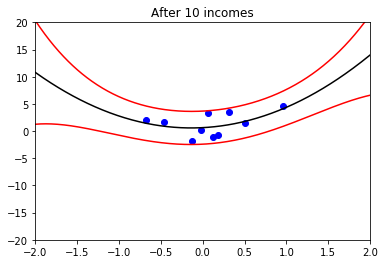

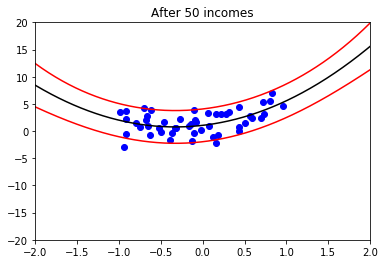

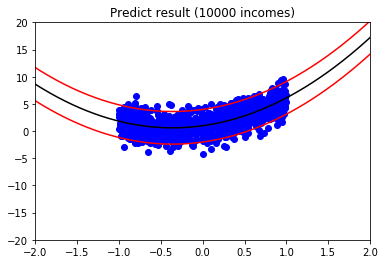

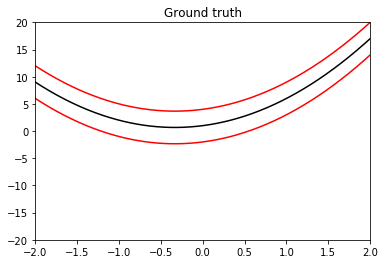

In [31]:
x=np.linspace(-2,2,500)
plot(10,x,mean[0],variance[0],'After 10 incomes',point_x,point_y)
plot(50,x,mean[1],variance[1],'After 50 incomes',point_x,point_y)
plot(num,x,mean[2],variance[2],'Predict result (10000 incomes)',point_x,point_y)
plot(0,x,w,np.zeros((n,n)),'Ground truth',point_x,point_y)